In [3]:
import numpy as np 
import pandas as pd 

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## change default settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)


In [5]:
listings_summary  = pd.read_csv('listings_summary_dec18.csv')
reviews = pd.read_csv('reviews_dec18.csv')

In [6]:
listings_summary.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213


In [7]:
print("The dataset has {} rows and {} columns.".format(*listings_summary.shape))

The dataset has 22895 rows and 16 columns.


In [8]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


In [9]:
print("The dataset has {} rows and {} columns.".format(*reviews.shape))

The dataset has 486920 rows and 6 columns.


We can get more valuable information by combining both the dataframes as it can provide useful insights with respect to each listing.

In [10]:
df = pd.merge(listings_summary,reviews,left_on='id',right_on='listing_id',how='left')

In [11]:
df.head(1)


,id_x,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365,9835.0,279854.0,2011-05-24,560832.0,Miriam,"Very hospitable, much appreciated.\r\n"


In [12]:
## dropping duplicate columns
df.drop(['listing_id'],axis=1,inplace=True)

In [13]:
df.columns

Index(['id_x', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'id_y', 'date', 'reviewer_id', 'reviewer_name',
       'comments'],
      dtype='object')

In [14]:
## droppping redundant columns --- of no use to our analysis
df.drop(['host_name','neighbourhood_group','last_review','id_y','reviewer_id','reviewer_name'],axis=1,inplace=True)

In [15]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 492162 rows and 15 columns.


In [16]:
## rename columns
df.rename(columns= {'id_x':'id','name':'title' },inplace=True)

In [17]:
df.head(2)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
0,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n"
1,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


Look whether missing values are present or not

In [18]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
comments,5845,1.2
reviews_per_month,5242,1.1
date,5242,1.1
title,3,0.0


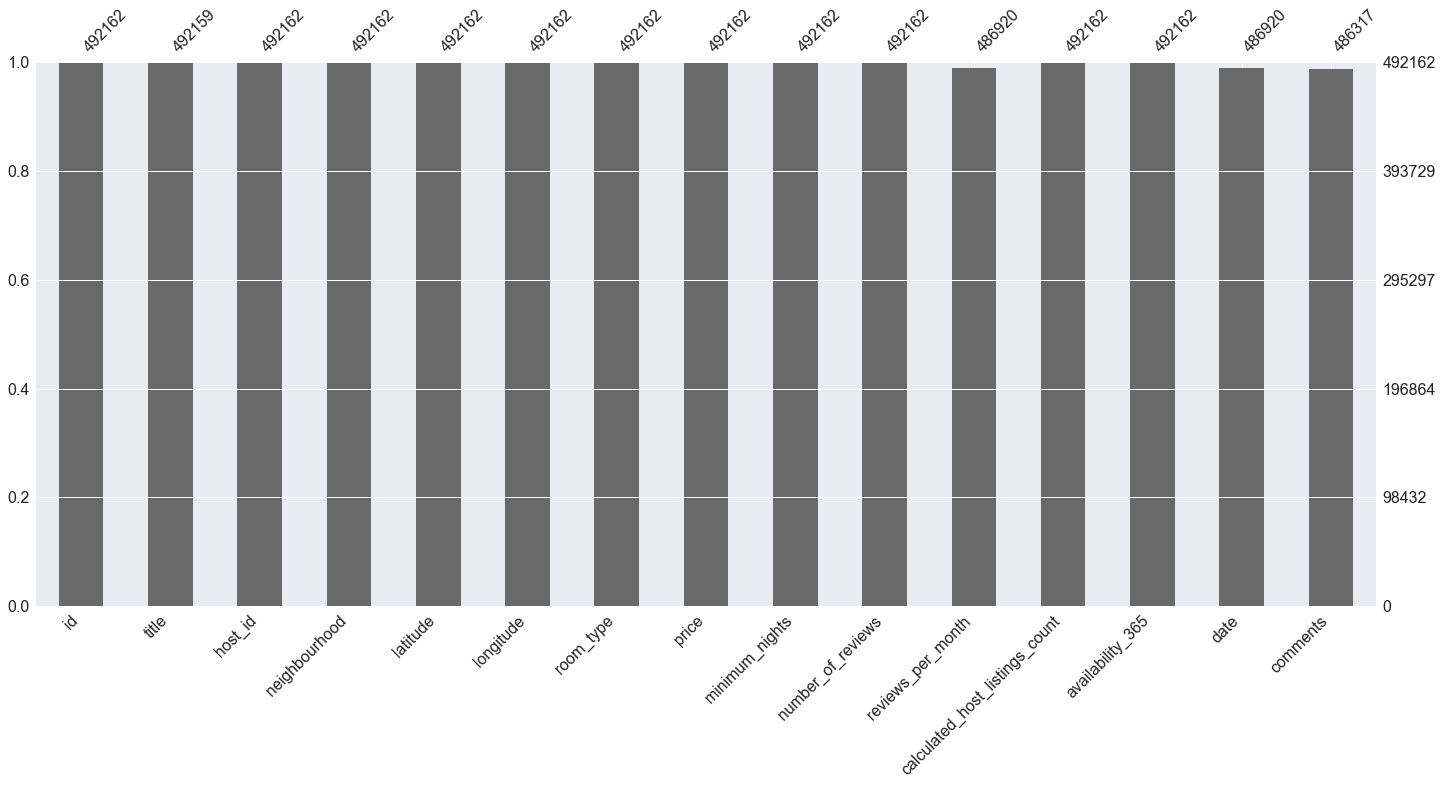

In [20]:
import missingno as msno

msno.bar(df)

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that comments, reviews_per_month,date and title columns have missing values. Next,it would make sense to find out the locations of the missing data.

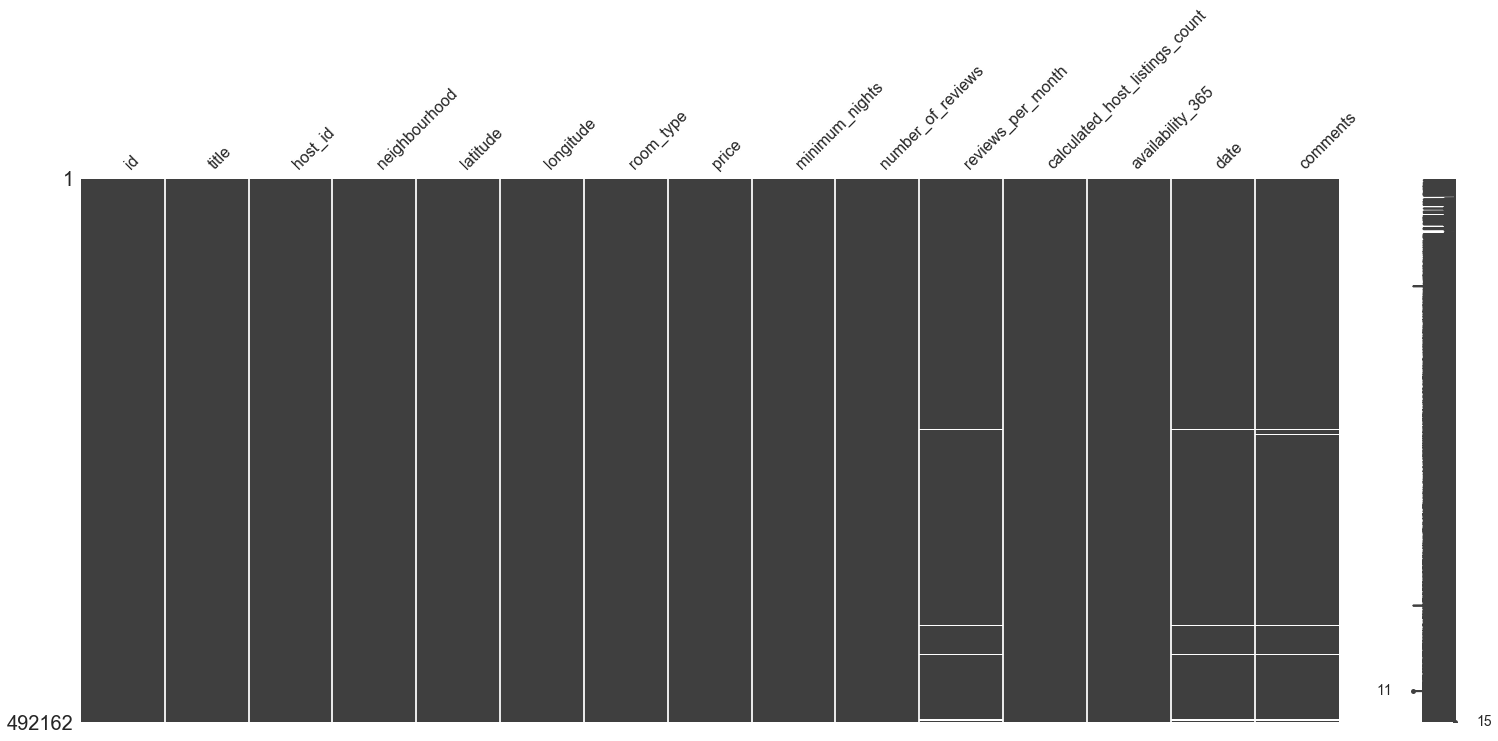

In [21]:
## location of missing values and see we can find any correlation betwen the missing values
msno.matrix(df);

We can these all missing values are highly correlated for all these 4 columns. From above visualization it is quite evident these missing values belongs to the same observations.Since the percentage is pretty low we are going it for now

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(486317, 15)

In [24]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Textual analysis

In [189]:
df.sample()

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
241227,13400479,Architectural Treehouse Studio,76271947,Stonnington,-37.848028,144.988057,Entire home/apt,109,2,189,6.24,1,284,2016-07-27,Sue and Paul were amazing hosts. The TreeHouse was clean and very beautiful. It was the perfect place to stay in Melbourne and it felt like home from the minute we arrived. Prahan is a lovely area with lots of great shops and cafes. Looking forward to the next time! Many thanks!!


### *Let's first focus on the comment section.*


## In what languages the comment are being made?

In [25]:
# ## credit: https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data/comments

# # we use Python's langdetect 
from langdetect import detect

# # write the function that detects the language
def language_detection(text):
     try:
         return detect(text)
     except:
         return None

In [ ]:
# %%time
df['language'] = df['comments'].apply(language_detection)

In [37]:
# # write the dataframe to a csv file in order to avoid the long runtime
df.to_csv('processed_df', index=False)


In [26]:
df =pd.read_csv('processed_df')

In [27]:
df.head(3)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language
0,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n",en
1,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW.",en
2,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2014-12-08,This was my first time using airbnb and it was great. I was going to a party in an area that didn't have much accommodation around and which was booked being Xmas anyway (and I would have needed to get a cab too) - so it was great to find a room within walking distance.\r\n\r\nManju the host was lovely and the room was as described. A very pleasant and easy experience as a whole.,en


In [28]:
df['language'].value_counts()

en       457936
zh-cn    8709  
ko       5118  
fr       3245  
de       1670  
ro       1188  
es       1024  
so       921   
af       867   
it       505   
ca       503   
nl       449   
ja       445   
tl       259   
cs       258   
pt       242   
zh-tw    237   
no       176   
pl       171   
cy       156   
vi       155   
sv       136   
da       134   
sw       122   
id       116   
fi       110   
hu       100   
hr       87    
et       67    
sk       43    
ru       38    
th       31    
sl       30    
tr       28    
lt       9     
sq       5     
el       3     
lv       3     
ar       1     
bg       1     
Name: language, dtype: int64

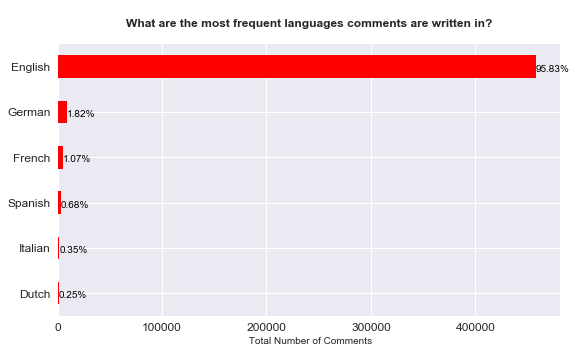

In [32]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="red", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

Since almost all the comments are in English, we will focus our analysis on these.

In [141]:
# splitting the dataframes for language 
df_eng = df[(df['language']=='en')]

In [142]:
df_eng['language'].value_counts()

en    457936
Name: language, dtype: int64

## Sentiment analysis of comments

If we can filter out the positive and negative comments we can compare what makes a listing likeable among for the tourist with respect to the the listings that are not liked.

For this we will using `VADER` package

In [143]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [144]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [145]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [161]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

Let's now have VADER produce all four scores for each of our English-language comments. As this takes roughly a quarter of an hour, it's a good idea to save the dataframe.

In [147]:
# %%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

In [148]:
# # write the dataframe to a csv file in order to avoid the long runtime
df_eng.to_csv('sentiment_df_eng', index=False)


In [149]:
df = pd.read_csv('sentiment_df_eng')

In [150]:
df.sample(1)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
379956,21107018,The Aloft studio apt in CBD- free tram gym pool,46780984,Melbourne,-37.816222,144.951896,Entire home/apt,100,1,50,3.5,18,129,2017-10-05,Great place but the internet is crap,en,0.311,0.457,0.233,-0.2144


### Percentage distribution of different sentiments

In [151]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    457936.000000
mean     0.836736     
std      0.233988     
min     -0.996400     
5%       0.421500     
10%      0.623900     
20%      0.778300     
30%      0.848100     
40%      0.892800     
50%      0.920300     
60%      0.941100     
70%      0.956700     
80%      0.969600     
90%      0.981000     
max      0.999600     
Name: sentiment_compound, dtype: float64

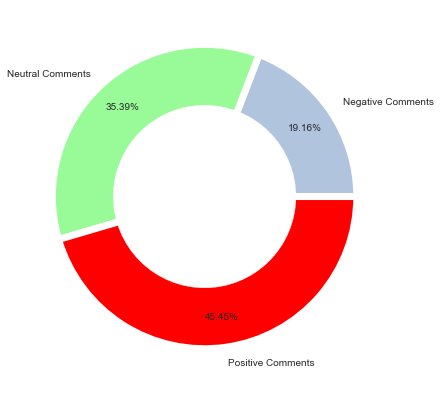

In [152]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Neutral Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightsteelblue', 'palegreen', 'red'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

Now let's check how long are the positive comments and negative comments. Is there any difference in their length wrt people opinions

In [153]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()


# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [154]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

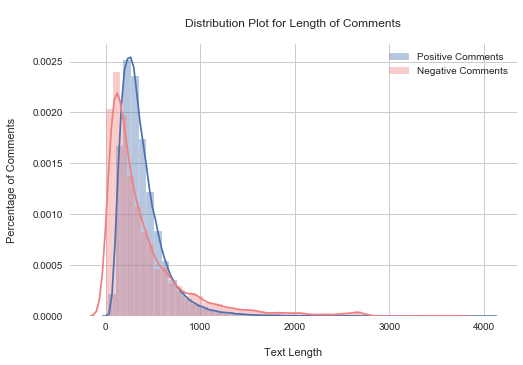

In [155]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50)
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

It can be clearly oberve that positive comments seems to be longer than the negative comments if are considereing the mode in our distribution.

## Most frequent words in comment section for all types of sentiments that contributes most to this sentiment

For this task we will be using WordClouds to get insights.


### Positive comments: What people like the most about the listings?

In [156]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [157]:
import re

def clean_text(string_in):
    string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
    string_in = string_in.lower()                         # Tranform to lower case    
    
    return string_in.strip()

df_pos.comments = df_pos.comments.apply(clean_text)

In [158]:
df_pos.comments

1         a beautiful house in a lovely quiet neighbourhood  which was only a   minute walk to our seminar venue at the manningham hotel nice parks around for a quick morning walk  buses   shops only a block away  rate very reasonable too  manju is a lovely lady who made me feel most welcome   comfortable  will definitely stay again   i also recommend doncaster shopping town   wow                                                                                                                                                                                                                                                                                        
2         this was my first time using airbnb and it was great  i was going to a party in an area that didn t have much accommodation around and which was booked being xmas anyway  and i would have needed to get a cab too    so it was great to find a room within walking distance     manju the host was lovely and the room was as descri

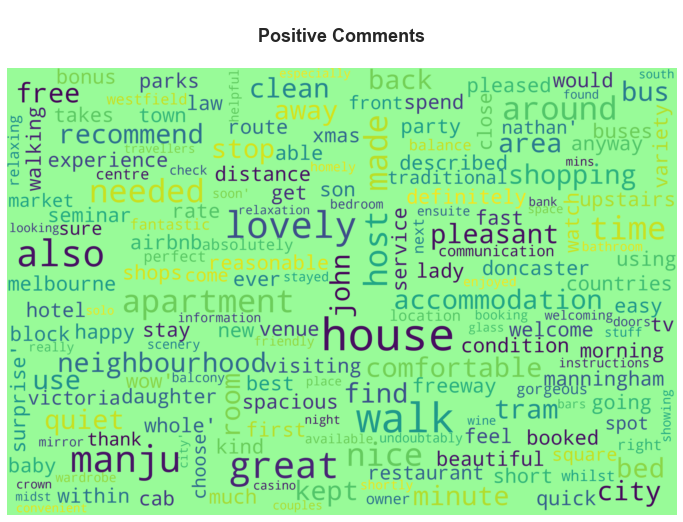

In [159]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()


wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositive')

### Negative comments: What people complain about?

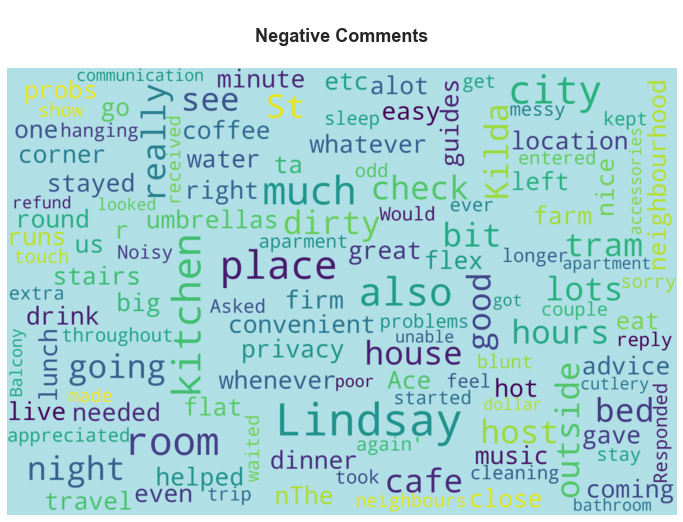

In [160]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="powderblue",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegative')